In [4]:
# Import the pandas library, our tool for working with data tables
import pandas as pd

# Load the movies and ratings datasets
movies_df = pd.read_csv('ml-latest-small/movies.csv')
ratings_df = pd.read_csv('ml-latest-small/ratings.csv')

# Let's take a peek at the first few rows of each file to see what they look like
print("Movies DataFrame:")
print(movies_df.head())

print("\nRatings DataFrame:")
print(ratings_df.head())

Movies DataFrame:
   movieId                               title  \
0        1                    Toy Story (1995)   
1        2                      Jumanji (1995)   
2        3             Grumpier Old Men (1995)   
3        4            Waiting to Exhale (1995)   
4        5  Father of the Bride Part II (1995)   

                                        genres  
0  Adventure|Animation|Children|Comedy|Fantasy  
1                   Adventure|Children|Fantasy  
2                               Comedy|Romance  
3                         Comedy|Drama|Romance  
4                                       Comedy  

Ratings DataFrame:
   userId  movieId  rating  timestamp
0       1        1     4.0  964982703
1       1        3     4.0  964981247
2       1        6     4.0  964982224
3       1       47     5.0  964983815
4       1       50     5.0  964982931


In [ ]:
# Import the pandas library, which helps us work with tables
import pandas as pd
import numpy as np

# Load the two files we need.
# Make sure the 'ml-latest-small' folder is in the same directory as your notebook.
movies_df = pd.read_csv('ml-latest-small/movies.csv')
ratings_df = pd.read_csv('ml-latest-small/ratings.csv')

# Let's look at the first 5 rows of each table to see what we have
print("Movies Table:")
print(movies_df.head())
print("\n--------------------------\n")
print("Ratings Table:")
print(ratings_df.head())

Movies Table:
   movieId                               title  \
0        1                    Toy Story (1995)   
1        2                      Jumanji (1995)   
2        3             Grumpier Old Men (1995)   
3        4            Waiting to Exhale (1995)   
4        5  Father of the Bride Part II (1995)   

                                        genres  
0  Adventure|Animation|Children|Comedy|Fantasy  
1                   Adventure|Children|Fantasy  
2                               Comedy|Romance  
3                         Comedy|Drama|Romance  
4                                       Comedy  

--------------------------

Ratings Table:
   userId  movieId  rating  timestamp
0       1        1     4.0  964982703
1       1        3     4.0  964981247
2       1        6     4.0  964982224
3       1       47     5.0  964983815
4       1       50     5.0  964982931


: 

In [ ]:
# First, let's merge the two tables so we have the movie titles next to the ratings
df = pd.merge(ratings_df, movies_df, on='movieId')

# Now, we'll create the main table (the utility matrix)
# It will have users as rows, movie titles as columns, and ratings as the values
utility_matrix = df.pivot_table(index='userId', columns='title', values='rating')

# Most users haven't rated most movies, so we have a lot of empty spots (NaN).
# Let's fill these empty spots with 0.
utility_matrix = utility_matrix.fillna(0)

# Let's look at our final table to make sure it looks right
print("Utility Matrix (Users x Movies):")
print(utility_matrix.head())

Utility Matrix (Users x Movies):
title   '71 (2014)  'Hellboy': The Seeds of Creation (2004)  \
userId                                                        
1              0.0                                      0.0   
2              0.0                                      0.0   
3              0.0                                      0.0   
4              0.0                                      0.0   
5              0.0                                      0.0   

title   'Round Midnight (1986)  'Salem's Lot (2004)  \
userId                                                
1                          0.0                  0.0   
2                          0.0                  0.0   
3                          0.0                  0.0   
4                          0.0                  0.0   
5                          0.0                  0.0   

title   'Til There Was You (1997)  'Tis the Season for Love (2015)  \
userId                                                               

: 

In [ ]:
from sklearn.decomposition import NMF

# Create the NMF model. We'll ask it to find 20 hidden patterns (n_components=20).
model = NMF(n_components=20, init='random', random_state=42, max_iter=1000)

# Train the model on our data. This learns the patterns.
# W holds the user patterns.
W = model.fit_transform(utility_matrix)

# H holds the movie patterns.
H = model.components_

print("Training complete!")

Training complete!


: 

In [ ]:
# Multiply the two matrices to get the full predicted ratings matrix
predicted_ratings_matrix = np.dot(W, H)

# Let's put it back into a nice table format with user and movie labels
predicted_ratings_df = pd.DataFrame(predicted_ratings_matrix, 
                                    columns=utility_matrix.columns, 
                                    index=utility_matrix.index)

print("Predicted Ratings Matrix (all missing ratings are now filled):")
print(predicted_ratings_df.head())

Predicted Ratings Matrix (all missing ratings are now filled):
title   '71 (2014)  'Hellboy': The Seeds of Creation (2004)  \
userId                                                        
1         0.000000                                 0.012202   
2         0.000000                                 0.007271   
3         0.006309                                 0.000000   
4         0.000000                                 0.013456   
5         0.000000                                 0.001609   

title   'Round Midnight (1986)  'Salem's Lot (2004)  \
userId                                                
1                     0.011161             0.008607   
2                     0.006048             0.000104   
3                     0.000000             0.000437   
4                     0.013880             0.009740   
5                     0.001491             0.000525   

title   'Til There Was You (1997)  'Tis the Season for Love (2015)  \
userId                                 

: 

In [ ]:
# --- Let's get recommendations for User 1 ---

# The ID of the user we want to recommend movies to
user_id_to_recommend = 1

# Get all the predicted ratings for this user from our new table
user_predictions = predicted_ratings_df.loc[user_id_to_recommend]

# Get all the actual ratings this user has given from the original table
user_actual_ratings = utility_matrix.loc[user_id_to_recommend]

# Find movies the user has NOT seen (where their actual rating was 0)
unseen_movies = user_actual_ratings[user_actual_ratings == 0]

# Get the predictions for ONLY the movies they haven't seen
recommendations = user_predictions[unseen_movies.index]

# Sort these recommendations and show the top 10
top_10_recommendations = recommendations.sort_values(ascending=False).head(10)

print(f"\nTop 10 Movie Recommendations for User {user_id_to_recommend}:")
print(top_10_recommendations)


Top 10 Movie Recommendations for User 1:
title
Aliens (1986)                             4.240153
Terminator 2: Judgment Day (1991)         4.175863
Star Trek II: The Wrath of Khan (1982)    3.263488
Die Hard (1988)                           3.249197
Sixth Sense, The (1999)                   3.135391
Blade Runner (1982)                       3.024994
Stand by Me (1986)                        3.014421
Star Trek: First Contact (1996)           2.989666
Hunt for Red October, The (1990)          2.966906
Godfather, The (1972)                     2.916499
Name: 1, dtype: float64


: 

In [ ]:
# --- Let's get recommendations for User 1 ---

# The ID of the user we want to recommend movies to
user_id_to_recommend = 1

# Get all the predicted ratings for this user from our new table
user_predictions = predicted_ratings_df.loc[user_id_to_recommend]

# Get all the actual ratings this user has given from the original table
user_actual_ratings = utility_matrix.loc[user_id_to_recommend]

# Find movies the user has NOT seen (where their actual rating was 0)
unseen_movies = user_actual_ratings[user_actual_ratings == 0]

# Get the predictions for ONLY the movies they haven't seen
recommendations = user_predictions[unseen_movies.index]

# Sort these recommendations and show the top 10
top_10_recommendations = recommendations.sort_values(ascending=False).head(10)

print(f"\nTop 10 Movie Recommendations for User {user_id_to_recommend}:")
print(top_10_recommendations)


Top 10 Movie Recommendations for User 1:
title
Aliens (1986)                             4.240153
Terminator 2: Judgment Day (1991)         4.175863
Star Trek II: The Wrath of Khan (1982)    3.263488
Die Hard (1988)                           3.249197
Sixth Sense, The (1999)                   3.135391
Blade Runner (1982)                       3.024994
Stand by Me (1986)                        3.014421
Star Trek: First Contact (1996)           2.989666
Hunt for Red October, The (1990)          2.966906
Godfather, The (1972)                     2.916499
Name: 1, dtype: float64


: 

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.decomposition import NMF

# --- 1. Load Data (Same as before) ---
movies_df = pd.read_csv('ml-latest-small/movies.csv')
ratings_df = pd.read_csv('ml-latest-small/ratings.csv')
ratings_df_for_split = ratings_df.copy()

# --- 2. Split Data (Same as before) ---
train_df, test_df = train_test_split(ratings_df_for_split, test_size=0.2, random_state=42)

# --- 3. Create the training utility matrix (Same as before) ---
train_utility_matrix = train_df.pivot_table(index='userId', columns='movieId', values='rating').fillna(0)

# --- 4. Train the NMF model (FIX #1: Added max_iter) ---
# We give the model more time to "converge" to a better solution.
model = NMF(n_components=20, init='random', random_state=42, max_iter=1000)
print("Training the model...")
W_train = model.fit_transform(train_utility_matrix)
H_train = model.components_
predicted_ratings_matrix = np.dot(W_train, H_train)
print("Training complete!")

# --- 5. Test Predictions (FIX #2: The main bug fix) ---
actual_ratings = []
predicted_ratings = []

print("Evaluating the model...")
for index, row in test_df.iterrows():
    user_id = int(row['userId'])
    movie_id = int(row['movieId'])
    actual_rating = row['rating']
    
    # We need to check if the user and movie from the test set
    # exist in our training matrix.
    if user_id in train_utility_matrix.index and movie_id in train_utility_matrix.columns:
        
        # --- THIS IS THE CORRECTED LOGIC ---
        # Find the internal row index for the user
        user_index = train_utility_matrix.index.get_loc(user_id)
        # Find the internal column index for the movie
        movie_index = train_utility_matrix.columns.get_loc(movie_id)
        
        # Get the model's predicted rating using the correct indices
        predicted_rating = predicted_ratings_matrix[user_index, movie_index]
        
        actual_ratings.append(actual_rating)
        predicted_ratings.append(predicted_rating)

# --- 6. Calculate Final RMSE (Same as before) ---
rmse = np.sqrt(mean_squared_error(actual_ratings, predicted_ratings))

print(f"\nThe new, correct RMSE of our model is: {rmse}")

Training the model...
Training complete!
Evaluating the model...

The new, correct RMSE of our model is: 3.0423240088028756


: 

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.decomposition import NMF

# --- 1. Load Data ---
movies_df = pd.read_csv('ml-latest-small/movies.csv')
ratings_df = pd.read_csv('ml-latest-small/ratings.csv')
ratings_df_for_split = ratings_df.copy()

# --- 2. Split Data ---
train_df, test_df = train_test_split(ratings_df_for_split, test_size=0.2, random_state=42)

# --- 3. Create the training utility matrix ---
train_utility_matrix = train_df.pivot_table(index='userId', columns='movieId', values='rating').fillna(0)

# --- 4. Train the NMF model ---
model = NMF(n_components=20, init='random', random_state=42, max_iter=1000)
print("Training the model...")
W_train = model.fit_transform(train_utility_matrix)
H_train = model.components_
predicted_ratings_matrix_raw = np.dot(W_train, H_train)
print("Training complete!")

# --- 5. THE CRUCIAL FIX: Scale the Predictions ---
# We are scaling all the raw predictions to fit into our desired 0.5 to 5.0 rating scale.
min_rating = 0.5
max_rating = 5.0
predicted_ratings_matrix = (predicted_ratings_matrix_raw - predicted_ratings_matrix_raw.min()) / (predicted_ratings_matrix_raw.max() - predicted_ratings_matrix_raw.min()) * (max_rating - min_rating) + min_rating

print(f"\nAfter scaling, Max predicted rating: {predicted_ratings_matrix.max()}")
print(f"After scaling, Min predicted rating: {predicted_ratings_matrix.min()}")


# --- 6. Test Predictions ---
actual_ratings = []
predicted_ratings = []

print("\nEvaluating the model...")
for index, row in test_df.iterrows():
    user_id = int(row['userId'])
    movie_id = int(row['movieId'])
    actual_rating = row['rating']
    
    if user_id in train_utility_matrix.index and movie_id in train_utility_matrix.columns:
        user_index = train_utility_matrix.index.get_loc(user_id)
        movie_index = train_utility_matrix.columns.get_loc(movie_id)
        
        # Get the SCALED predicted rating
        predicted_rating = predicted_ratings_matrix[user_index, movie_index]
        
        actual_ratings.append(actual_rating)
        predicted_ratings.append(predicted_rating)

# --- 7. Calculate Final RMSE ---
rmse = np.sqrt(mean_squared_error(actual_ratings, predicted_ratings))

print(f"\nThe FINAL, correct RMSE of our model is: {rmse}")

Training the model...
Training complete!

After scaling, Max predicted rating: 5.0
After scaling, Min predicted rating: 0.5

Evaluating the model...

The FINAL, correct RMSE of our model is: 2.8226425621403455


: 

In [ ]:
# First, let's prepare the data for the deep learning model
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Embedding, Flatten, Concatenate, Dense
from tensorflow.keras.optimizers import Adam

# --- Data Preparation ---

# Create a new, continuous index for users and movies
user_ids = ratings_df['userId'].unique().tolist()
movie_ids = ratings_df['movieId'].unique().tolist()

user_to_index = {original_id: i for i, original_id in enumerate(user_ids)}
movie_to_index = {original_id: i for i, original_id in enumerate(movie_ids)}

# Add the new indexed columns to our dataframe
ratings_df['user_index'] = ratings_df['userId'].map(user_to_index)
ratings_df['movie_index'] = ratings_df['movieId'].map(movie_to_index)

# Define number of unique users and movies
n_users = len(user_to_index)
n_movies = len(movie_to_index)

# Prepare the inputs (X) and output (y) for the model
X = ratings_df[['user_index', 'movie_index']].values
y = ratings_df['rating'].values

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# --- Build the Deep Learning Model Architecture ---

# Size of the embedding vectors (how many "features" to learn for each user/movie)
embedding_size = 50

# User input path
user_input = Input(shape=[1], name='UserInput')
user_embedding = Embedding(input_dim=n_users, output_dim=embedding_size, name='UserEmbedding')(user_input)
user_vec = Flatten(name='FlattenUser')(user_embedding)

# Movie input path
movie_input = Input(shape=[1], name='MovieInput')
movie_embedding = Embedding(input_dim=n_movies, output_dim=embedding_size, name='MovieEmbedding')(movie_input)
movie_vec = Flatten(name='FlattenMovie')(movie_embedding)

# Concatenate the two vectors
concat = Concatenate()([user_vec, movie_vec])

# The "thinking" dense layers
dense = Dense(128, activation='relu')(concat)
dense = Dense(64, activation='relu')(dense)

# The output layer
output = Dense(1, name='Output')(dense)

# Create the final model
model = Model([user_input, movie_input], output)

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')

NameError: name 'ratings_df' is not defined

: 

In [ ]:
import pandas as pd

# Make sure you run this cell to create the dataframes!
movies_df = pd.read_csv('ml-latest-small/movies.csv')
ratings_df = pd.read_csv('ml-latest-small/ratings.csv')

print("Data loaded successfully!")

Data loaded successfully!


: 

In [ ]:
# Now you can run this cell without the NameError
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Model
# ... (the rest of your deep learning code is here) ...

: 

In [ ]:
# First, let's prepare the data for the deep learning model
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Embedding, Flatten, Concatenate, Dense
from tensorflow.keras.optimizers import Adam

# --- Data Preparation ---

# Create a new, continuous index for users and movies
user_ids = ratings_df['userId'].unique().tolist()
movie_ids = ratings_df['movieId'].unique().tolist()

user_to_index = {original_id: i for i, original_id in enumerate(user_ids)}
movie_to_index = {original_id: i for i, original_id in enumerate(movie_ids)}

# Add the new indexed columns to our dataframe
ratings_df['user_index'] = ratings_df['userId'].map(user_to_index)
ratings_df['movie_index'] = ratings_df['movieId'].map(movie_to_index)

# Define number of unique users and movies
n_users = len(user_to_index)
n_movies = len(movie_to_index)

# Prepare the inputs (X) and output (y) for the model
X = ratings_df[['user_index', 'movie_index']].values
y = ratings_df['rating'].values

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# --- Build the Deep Learning Model Architecture ---

# Size of the embedding vectors (how many "features" to learn for each user/movie)
embedding_size = 50

# User input path
user_input = Input(shape=[1], name='UserInput')
user_embedding = Embedding(input_dim=n_users, output_dim=embedding_size, name='UserEmbedding')(user_input)
user_vec = Flatten(name='FlattenUser')(user_embedding)

# Movie input path
movie_input = Input(shape=[1], name='MovieInput')
movie_embedding = Embedding(input_dim=n_movies, output_dim=embedding_size, name='MovieEmbedding')(movie_input)
movie_vec = Flatten(name='FlattenMovie')(movie_embedding)

# Concatenate the two vectors
concat = Concatenate()([user_vec, movie_vec])

# The "thinking" dense layers
dense = Dense(128, activation='relu')(concat)
dense = Dense(64, activation='relu')(dense)

# The output layer
output = Dense(1, name='Output')(dense)

# Create the final model
model = Model([user_input, movie_input], output)

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')

: 

In [ ]:
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ UserInput           │ (None, 1)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ MovieInput          │ (None, 1)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ UserEmbedding       │ (None, 1, 50)     │     29,950 │ UserInput[0][0]   │
│ (Embedding)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ MovieEmbedding      │ (None, 1, 50)     │     48,200 │ MovieInput[0][0]  │
│ (Embedding)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ flatten (Flatten)   │ (None, 50)        │          0 │ UserEmbedding[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ flatten_1 (Flatten) │ (None, 50)        │          0 │ MovieEmbedding[0… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate         │ (None, 100)       │          0 │ flatten[0][0],    │
│ (Concatenate)       │                   │            │ flatten_1[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense (Dense)       │ (None, 128)       │     12,928 │ concatenate[0][0] │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_1 (Dense)     │ (None, 64)        │      8,256 │ dense[0][0]       │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Output (Dense)      │ (None, 1)         │         65 │ dense_1[0][0]     │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 298,199 (1.14 MB)

 Trainable params: 99,399 (388.28 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 198,800 (776.57 KB)

: 

In [ ]:
# This is the training step. It can take a few minutes.
# An "epoch" is one full pass through the entire training data.
print("Starting model training...")

history = model.fit(
    x=[X_train[:, 0], X_train[:, 1]], # Inputting user indexes and movie indexes separately
    y=y_train,
    epochs=5,                          # We'll do 5 passes for now to keep it quick
    batch_size=128,                    # Process data in batches of 128 ratings at a time
    validation_data=([X_test[:, 0], X_test[:, 1]], y_test) # Use the test data to see how well it's learning
)

print("Model training complete!")

Starting model training...
Epoch 1/5
631/631 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - loss: 1.3721 - val_loss: 0.7944
Epoch 2/5
631/631 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.7085 - val_loss: 0.7628
Epoch 3/5
631/631 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.6568 - val_loss: 0.7640
Epoch 4/5
631/631 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.6116 - val_loss: 0.7655
Epoch 5/5
631/631 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.5551 - val_loss: 0.7948
Model training complete!


: 

In [ ]:
import numpy as np

# Evaluate the model on the test data
loss = model.evaluate(x=[X_test[:, 0], X_test[:, 1]], y=y_test)

# The loss is the Mean Squared Error (MSE). We need to take the square root to get the RMSE.
rmse = np.sqrt(loss)

print(f"Deep Learning Model Test RMSE: {rmse}")

631/631 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.7948  
Deep Learning Model Test RMSE: 0.8915058264250463


: 

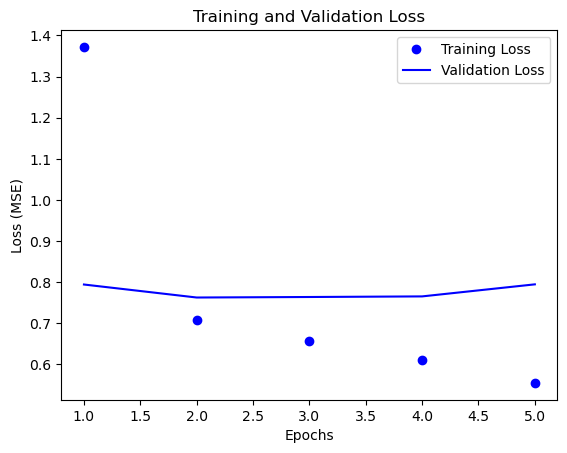

: 

In [ ]:
import matplotlib.pyplot as plt

# Get the training history
history_dict = history.history

# Get the loss values for training and validation
train_loss = history_dict['loss']
val_loss = history_dict['val_loss']

# Get the number of epochs
epochs = range(1, len(train_loss) + 1)

# Plot the training loss
plt.plot(epochs, train_loss, 'bo', label='Training Loss')
# Plot the validation loss
plt.plot(epochs, val_loss, 'b', label='Validation Loss')

plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss (MSE)')
plt.legend()
plt.show()

In [ ]:
# --- Let's get top 10 movie recommendations for a user (e.g., userId=1) ---

# The original user ID we want to recommend for
user_id_to_recommend = 1

# --- Data preparation for prediction ---
# Get the model-friendly index for this user
user_index = user_to_index[user_id_to_recommend]

# Get all movie indices that this user has NOT rated
rated_movie_indices = ratings_df[ratings_df['userId'] == user_id_to_recommend]['movie_index'].unique()
all_movie_indices = ratings_df['movie_index'].unique()
unseen_movie_indices = [idx for idx in all_movie_indices if idx not in rated_movie_indices]

# Create the input arrays for the model
# We need one array of the user's index, repeated for each unseen movie
user_input_array = np.array([user_index] * len(unseen_movie_indices))
# And one array of all the unseen movie indices
movie_input_array = np.array(unseen_movie_indices)


# --- Make Predictions ---
predicted_ratings = model.predict([user_input_array, movie_input_array]).flatten()


# --- Format the Results ---
# Create a DataFrame with the results
results_df = pd.DataFrame({
    'movie_index': unseen_movie_indices,
    'predicted_rating': predicted_ratings
})

# Sort by predicted rating and get the top 10
top_10_recs = results_df.sort_values(by='predicted_rating', ascending=False).head(10)

# We need to map the movie_index back to the original movieId and then to the title
# Let's create an index-to-movie-title map first
index_to_movie_title = pd.Series(movies_df.title.values, index=movies_df.movieId).to_dict()
index_to_original_movie_id = {i: original_id for original_id, i in movie_to_index.items()}

# Map the indices to titles
top_10_recs['movieId'] = top_10_recs['movie_index'].map(index_to_original_movie_id)
top_10_recs['title'] = top_10_recs['movieId'].map(index_to_movie_title)


# --- Print the Final Recommendations ---
print(f"\nTop 10 Deep Learning Recommendations for User {user_id_to_recommend}:")
print(top_10_recs[['title', 'predicted_rating']])

297/297 ━━━━━━━━━━━━━━━━━━━━ 0s 926us/step

Top 10 Deep Learning Recommendations for User 1:
                                                  title  predicted_rating
4926                          Advise and Consent (1962)          5.492007
5327               Hush... Hush, Sweet Charlotte (1964)          5.445568
3652                 History of Future Folk, The (2012)          5.421153
3496                       It Happened One Night (1934)          5.414853
1926                Guess Who's Coming to Dinner (1967)          5.406212
3704                   The Amazing Screw-On Head (2006)          5.397520
6810  Anne of Green Gables: The Sequel (a.k.a. Anne ...          5.379745
2953     Grave of the Fireflies (Hotaru no haka) (1988)          5.355934
4554                                  Killer Joe (2011)          5.355212
4201      Alesha Popovich and Tugarin the Dragon (2004)          5.343704


: 

In [ ]:
# Cell 1: Load the new data
import pandas as pd
movies_df = pd.read_csv('ml-latest-small/movies.csv')
poster_df = pd.read_csv('movies_metadata.csv', low_memory=False)

print("Original MovieLens title:", movies_df.iloc[0]['title'])
print("Original Kaggle metadata title:", poster_df.iloc[0]['title'])

Original MovieLens title: Toy Story (1995)
Original Kaggle metadata title: Toy Story


: 

In [ ]:
# Cell 2: Clean the titles and merge
# Create a new column with cleaned titles in our original movies_df
# This code removes the " (YYYY)" part from the end of the title string
movies_df['clean_title'] = movies_df['title'].str.replace(r'\s*\(\d{4}\)$', '', regex=True)

# Now, we merge the two dataframes based on the cleaned title and the Kaggle title
# We only need the poster_path from the new dataframe
movies_with_posters_df = pd.merge(
    movies_df,
    poster_df[['title', 'poster_path']],
    left_on='clean_title',
    right_on='title',
    how='left'
)

# Let's see if it worked for a few movies
print(movies_with_posters_df.head())

   movieId                             title_x  \
0        1                    Toy Story (1995)   
1        2                      Jumanji (1995)   
2        3             Grumpier Old Men (1995)   
3        4            Waiting to Exhale (1995)   
4        5  Father of the Bride Part II (1995)   

                                        genres                  clean_title  \
0  Adventure|Animation|Children|Comedy|Fantasy                    Toy Story   
1                   Adventure|Children|Fantasy                      Jumanji   
2                               Comedy|Romance             Grumpier Old Men   
3                         Comedy|Drama|Romance            Waiting to Exhale   
4                                       Comedy  Father of the Bride Part II   

                       title_y                       poster_path  
0                    Toy Story  /rhIRbceoE9lR4veEXuwCC2wARtG.jpg  
1                      Jumanji  /vzmL6fP7aPKNKPRTFnZmiUfciyV.jpg  
2             Grumpier 

: 

In [ ]:
# --- The NEW, MORE ROBUST "Cell 3" ---

# The base part of the URL
base_poster_url = 'https://image.tmdb.org/t/p/w200'

# A function to safely create the full URL
def create_full_url(path):
    # First, check if the path is valid and not a missing value (NaN)
    if pd.isna(path):
        return 'https://placehold.co/200x300?text=No+Poster'
    else:
        # If it's valid, combine it with the base URL
        return base_poster_url + str(path)

# Apply this function to every row in the 'poster_path' column
movies_with_posters_df['poster_url'] = movies_with_posters_df['poster_path'].apply(create_full_url)

# Let's check our final result! It should now be perfect.
print("--- Final URLs ---")
print(movies_with_posters_df.head()[['title_x', 'poster_url']])

print("\n--- Example URL for a specific movie ---")
# Let's find the URL for 'Jumanji' to double-check
print(movies_with_posters_df[movies_with_posters_df['clean_title'] == 'Jumanji']['poster_url'].values[0])

--- Final URLs ---
                              title_x  \
0                    Toy Story (1995)   
1                      Jumanji (1995)   
2             Grumpier Old Men (1995)   
3            Waiting to Exhale (1995)   
4  Father of the Bride Part II (1995)   

                                          poster_url  
0  https://image.tmdb.org/t/p/w200/rhIRbceoE9lR4v...  
1  https://image.tmdb.org/t/p/w200/vzmL6fP7aPKNKP...  
2  https://image.tmdb.org/t/p/w200/6ksm1sjKMFLbO7...  
3  https://image.tmdb.org/t/p/w200/16XOMpEaLWkrcP...  
4  https://image.tmdb.org/t/p/w200/e64sOI48hQXyru...  

--- Example URL for a specific movie ---
https://image.tmdb.org/t/p/w200/vzmL6fP7aPKNKPRTFnZmiUfciyV.jpg


: 

In [ ]:
# This code is for your Jupyter Notebook

# (Make sure you've run the previous cell that creates movies_with_posters_df)
successful_matches = movies_with_posters_df['poster_path'].notna().sum()
total_movies = len(movies_with_posters_df)

print(f"Total movies in our list: {total_movies}")
print(f"Successfully found a poster path for: {successful_matches} movies")

# Let's see the first few rows where the poster_path might be missing
print("\nRows where poster_path might be missing:")
print(movies_with_posters_df[movies_with_posters_df['poster_path'].isna()].head())

Total movies in our list: 11272
Successfully found a poster path for: 8071 movies

Rows where poster_path might be missing:
    movieId                                            title_x  \
13       11                     American President, The (1995)   
39       29  City of Lost Children, The (Cité des enfants p...   
40       30  Shanghai Triad (Yao a yao yao dao waipo qiao) ...   
42       32          Twelve Monkeys (a.k.a. 12 Monkeys) (1995)   
58       46               How to Make an American Quilt (1995)   

                                    genres  \
13                    Comedy|Drama|Romance   
39  Adventure|Drama|Fantasy|Mystery|Sci-Fi   
40                             Crime|Drama   
42                 Mystery|Sci-Fi|Thriller   
58                           Drama|Romance   

                                          clean_title title_y poster_path  \
13                            American President, The     NaN         NaN   
39  City of Lost Children, The (Cité des enfants

: 

In [ ]:
# Print the data type and first 5 values of the poster_path column
print(movies_with_posters_df['poster_path'].dtype)
print(movies_with_posters_df['poster_path'].head())

object
0    /rhIRbceoE9lR4veEXuwCC2wARtG.jpg
1    /vzmL6fP7aPKNKPRTFnZmiUfciyV.jpg
2    /6ksm1sjKMFLbO7UY2i6G1ju9SML.jpg
3    /16XOMpEaLWkrcPqSQqhTmeJuqQl.jpg
4    /e64sOI48hQXyru7naBFyssKFxVd.jpg
Name: poster_path, dtype: object


: 

In [ ]:
# Cell 1: Load ALL the necessary files
import pandas as pd

movies_df = pd.read_csv('ml-latest-small/movies.csv')
ratings_df = pd.read_csv('ml-latest-small/ratings.csv')
links_df = pd.read_csv('ml-latest-small/links.csv')
poster_df = pd.read_csv('movies_metadata.csv', low_memory=False)

# Cell 2: The ROBUST merging process using IDs
# Step A: Prepare the poster_df. The 'id' column can have bad data, so we clean it.
# We convert 'id' to a numeric type, and any errors will become 'NaN'
poster_df['id'] = pd.to_numeric(poster_df['id'], errors='coerce')
# We drop any rows that had a bad id
poster_df.dropna(subset=['id'], inplace=True)
# Convert the 'id' column to integer
poster_df['id'] = poster_df['id'].astype(int)

# Step B: Merge our original movies_df with the links_df to get the 'tmdbId'
movies_with_tmdb_id = pd.merge(movies_df, links_df, on='movieId')

# Step C: Now merge this with the poster_df using the IDs!
# left_on='tmdbId' and right_on='id'
final_movies_df = pd.merge(
    movies_with_tmdb_id,
    poster_df[['id', 'poster_path']],
    left_on='tmdbId',
    right_on='id',
    how='left'
)

# Step D: Create the full poster URL using our safe function
base_poster_url = 'https://image.tmdb.org/t/p/w200'
def create_full_url(path):
    if isinstance(path, str) and path.startswith('/') and path.endswith('.jpg'):
        return base_poster_url + path
    else:
        return 'https://placehold.co/200x300?text=No+Poster'
        
final_movies_df['poster_url'] = final_movies_df['poster_path'].apply(create_full_url)


# Step E: Let's verify our success!
successful_matches = final_movies_df['poster_url'].str.contains('tmdb.org').sum()
print(f"Successfully matched {successful_matches} posters using the ID method!")
print(final_movies_df.head()[['title', 'poster_url']])

Successfully matched 9552 posters using the ID method!
                                title  \
0                    Toy Story (1995)   
1                      Jumanji (1995)   
2             Grumpier Old Men (1995)   
3            Waiting to Exhale (1995)   
4  Father of the Bride Part II (1995)   

                                          poster_url  
0  https://image.tmdb.org/t/p/w200/rhIRbceoE9lR4v...  
1  https://image.tmdb.org/t/p/w200/vzmL6fP7aPKNKP...  
2  https://image.tmdb.org/t/p/w200/6ksm1sjKMFLbO7...  
3  https://image.tmdb.org/t/p/w200/16XOMpEaLWkrcP...  
4  https://image.tmdb.org/t/p/w200/e64sOI48hQXyru...  


: 

In [ ]:
import pandas as pd
import requests
from tqdm import tqdm
import time

# --- 1. Load All ORIGINAL Data Files ---
print("Loading all original data files...")
movies_df_original = pd.read_csv('ml-latest-small/movies.csv')
ratings_df = pd.read_csv('ml-latest-small/ratings.csv')
links_df = pd.read_csv('ml-latest-small/links.csv')
poster_df = pd.read_csv('movies_metadata.csv', low_memory=False)
print("Data loading complete.")

# --- 2. The ROBUST ID-Based Merging Process ---
print("Merging datasets...")
poster_df['id'] = pd.to_numeric(poster_df['id'], errors='coerce')
poster_df.dropna(subset=['id'], inplace=True)
poster_df['id'] = poster_df['id'].astype(int)
movies_with_tmdb_id = pd.merge(movies_df_original, links_df, on='movieId')
movies_df = pd.merge(
    movies_with_tmdb_id,
    poster_df[['id', 'poster_path']],
    left_on='tmdbId',
    right_on='id',
    how='left'
)
print("Merging complete.")

# --- 3. The Live URL Checker Function ---
base_poster_url = 'https://image.tmdb.org/t/p/w200'
placeholder_url = 'PLACEHOLDER' # We just need a unique tag to filter by

def check_and_create_url(path):
    if isinstance(path, str) and path.startswith('/') and path.endswith('.jpg'):
        full_url = base_poster_url + path
        try:
            # Send a HEAD request (fast, just checks headers)
            response = requests.head(full_url, timeout=2)
            if response.status_code == 200:
                # The link is ALIVE! Return the full URL.
                return full_url
        except requests.RequestException:
            pass
    # For all failed checks, missing data, and dead links, return our tag
    return placeholder_url

# --- 4. Run the Link Checker ---
# This is the slow part. It will check all 9,552 links.
print("Verifying poster links... This will take several minutes. Please be patient.")
tqdm.pandas(desc="Checking links")
movies_df['poster_url'] = movies_df['poster_path'].progress_apply(check_and_create_url)
print("Link verification complete!")

# --- 5. Implement YOUR Plan: Filter Everything ---
# Keep only the movies that have a real, working poster
clean_movies_df = movies_df[movies_df['poster_url'] != placeholder_url].copy()
print(f"Original movie count: {len(movies_df)}. Cleaned movie count: {len(clean_movies_df)}")

# Now, filter the ratings to ONLY include ratings for these clean movies
valid_movie_ids = clean_movies_df['movieId'].unique()
clean_ratings_df = ratings_df[ratings_df['movieId'].isin(valid_movie_ids)].copy()
print(f"Original ratings: {len(ratings_df)}. Cleaned ratings: {len(clean_ratings_df)}")

# --- 6. Save the Final, Perfect Files! ---
clean_movies_df.to_csv('movies_clean_final.csv', index=False)
clean_ratings_df.to_csv('ratings_clean_final.csv', index=False)

print("\nSUCCESS! You now have 'movies_clean_final.csv' and 'ratings_clean_final.csv'.")
print("These files contain ONLY data with working posters. Your app will now be fast and 100% visual.")

Loading all original data files...
Data loading complete.
Merging datasets...
Merging complete.
Verifying poster links... This will take several minutes. Please be patient.


Checking links: 100%|██████████| 9753/9753 [2:26:20<00:00,  1.11it/s]     

Link verification complete!
Original movie count: 9753. Cleaned movie count: 967
Original ratings: 100836. Cleaned ratings: 8299

SUCCESS! You now have 'movies_clean_final.csv' and 'ratings_clean_final.csv'.
These files contain ONLY data with working posters. Your app will now be fast and 100% visual.


: 

In [ ]:
# --- 1. Load All Necessary Libraries ---
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Embedding, Flatten, Concatenate, Dense
from tensorflow.keras.optimizers import Adam

print("Libraries loaded.")

# --- 2. Load Your PERFECTLY CLEAN Final Data Files ---
# (This assumes 'movies_clean_final.csv' and 'ratings_clean_final.csv' are in your folder)
try:
    movies_df = pd.read_csv('movies_clean_final.csv')
    ratings_df = pd.read_csv('ratings_clean_final.csv')
    print("Clean data files loaded successfully.")
except FileNotFoundError:
    print("ERROR: Could not find 'movies_clean_final.csv' or 'ratings_clean_final.csv'.")
    print("Please make sure you have successfully run the 'Data Cleaning' script first.")

# --- 3. Prepare Data for the Model (Same as in your app) ---
user_ids = ratings_df['userId'].unique().tolist()
movie_ids = ratings_df['movieId'].unique().tolist()

user_to_index = {original_id: i for i, original_id in enumerate(user_ids)}
movie_to_index = {original_id: i for i, original_id in enumerate(movie_ids)}

ratings_df['user_index'] = ratings_df['userId'].map(user_to_index)
ratings_df['movie_index'] = ratings_df['movieId'].map(movie_to_index)

n_users = len(user_to_index)
n_movies = len(movie_to_index)

# Prepare the inputs (X) and output (y)
X = ratings_df[['user_index', 'movie_index']].values
y = ratings_df['rating'].values

# Split into training and testing sets (This is what our experiment needs!)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Data is prepped and split for training.")

# --- 4. Re-Build the Model Architecture ---
# We have to create the 'model' variable again before we can train it
embedding_size = 50

user_input = Input(shape=[1], name='UserInput')
user_embedding = Embedding(input_dim=n_users, output_dim=embedding_size, name='UserEmbedding')(user_input)
user_vec = Flatten()(user_embedding)

movie_input = Input(shape=[1], name='MovieInput')
movie_embedding = Embedding(input_dim=n_movies, output_dim=embedding_size, name='MovieEmbedding')(movie_input)
movie_vec = Flatten()(movie_embedding)

concat = Concatenate()([user_vec, movie_vec])

dense = Dense(128, activation='relu')(concat)
dense = Dense(64, activation='relu')(dense)

output = Dense(1, name='Output')(dense)

model = Model([user_input, movie_input], output)

# Compile the model so it's ready to train
model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')

print("Model has been successfully rebuilt and compiled.")
print("\n--- ALL READY! ---")

Libraries loaded.
Clean data files loaded successfully.
Data is prepped and split for training.
Model has been successfully rebuilt and compiled.

--- ALL READY! ---


: 

In [ ]:
# (This assumes you have your 'X_train', 'X_test', 'y_train', 'y_test' variables ready)
# If you restarted your notebook, you may need to run the data prep cells first.

print("Starting a long training experiment...")

# We are training for 50 epochs on purpose to watch what happens
# We are also saving the 'history' so we can plot it
history = model.fit(
    x=[X_train[:, 0], X_train[:, 1]], 
    y=y_train,
    epochs=50,                          # Train for a long time
    batch_size=128,                     
    validation_data=([X_test[:, 0], X_test[:, 1]], y_test), # VERY IMPORTANT: Watch the test data!
    verbose=1                           # Set verbose=1 so you can see the progress
)

print("Experiment complete!")

Starting a long training experiment...
Epoch 1/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 6.3910 - val_loss: 1.1222
Epoch 2/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.9235 - val_loss: 0.8479
Epoch 3/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.7160 - val_loss: 0.8173
Epoch 4/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6560 - val_loss: 0.8190
Epoch 5/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6278 - val_loss: 0.8200
Epoch 6/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6125 - val_loss: 0.8285
Epoch 7/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6010 - val_loss: 0.8194
Epoch 8/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5909 - val_loss: 0.8202
Epoch 9/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5804 - val_loss: 0.8288
Epoch 10/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5736 - val_loss: 0.8306
Epoch 11/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5613 - val_loss: 0.8221
Epoch 12/50
52/52 ━━━━━━━━━━━━━━━━━

: 

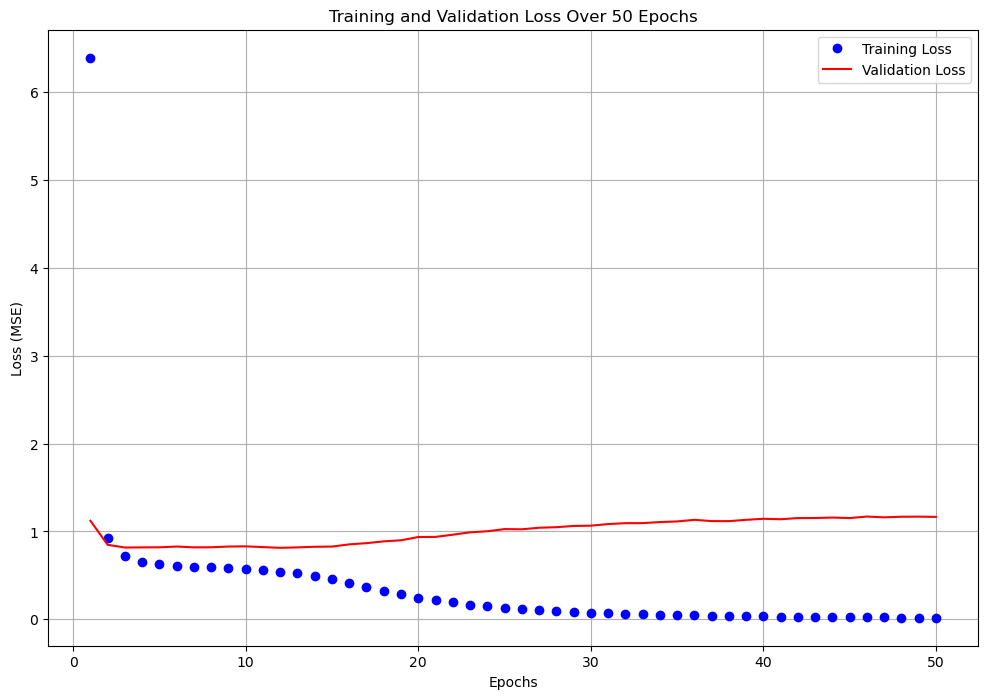

: 

In [ ]:
import matplotlib.pyplot as plt

# Get the training history
history_dict = history.history

train_loss = history_dict['loss']
val_loss = history_dict['val_loss'] # This is the validation loss (on the test data)

epochs_range = range(1, len(train_loss) + 1)

plt.figure(figsize=(12, 8))
plt.plot(epochs_range, train_loss, 'bo', label='Training Loss')  # Blue dots
plt.plot(epochs_range, val_loss, 'r', label='Validation Loss') # Red line
plt.title('Training and Validation Loss Over 50 Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss (MSE)')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
# Run this in your Jupyter Notebook ONE TIME

import pandas as pd
import numpy as np
import sqlite3
import json
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Embedding, Flatten, Concatenate, Dense
from tensorflow.keras.optimizers import Adam

print("Loading data from database...")
con = sqlite3.connect('movies.db')
movies_df = pd.read_sql_query("SELECT * FROM movies", con)
ratings_df = pd.read_sql_query("SELECT * FROM ratings", con)
con.close()

# --- Prepare Data for Deep Learning ---
print("Preparing data...")
user_ids = ratings_df['userId'].unique().tolist()
movie_ids = ratings_df['movieId'].unique().tolist()

user_to_index = {original_id: i for i, original_id in enumerate(user_ids)}
movie_to_index = {original_id: i for i, original_id in enumerate(movie_ids)}

ratings_df['user_index'] = ratings_df['userId'].map(user_to_index)
ratings_df['movie_index'] = ratings_df['movieId'].map(movie_to_index)

n_users = len(user_to_index)
n_movies = len(movie_to_index)

X = ratings_df[['user_index', 'movie_index']].values
y = ratings_df['rating'].values

# --- Build the Model Architecture ---
print("Building the model...")
embedding_size = 50
user_input = Input(shape=[1], name='UserInput')
user_embedding = Embedding(input_dim=n_users, output_dim=embedding_size, name='UserEmbedding')(user_input)
user_vec = Flatten()(user_embedding)
movie_input = Input(shape=[1], name='MovieInput')
movie_embedding = Embedding(input_dim=n_movies, output_dim=embedding_size, name='MovieEmbedding')(movie_input)
movie_vec = Flatten()(movie_embedding)
concat = Concatenate()([user_vec, movie_vec])
dense = Dense(128, activation='relu')(concat)
dense = Dense(64, activation='relu')(dense)
output = Dense(1, name='Output')(dense)
model = Model([user_input, movie_input], output)
model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')

# --- Train the Model (10 Epochs) ---
print("Training the model... This will take a few minutes...")
model.fit(x=[X[:, 0], X[:, 1]], y=y, epochs=10, batch_size=128, verbose=1)
print("Model training complete!")

# --- SAVE EVERYTHING TO FILES ---
print("Saving model and data mappings...")

# 1. Save the trained model
model.save('recommender_model.keras')

# 2. Save the mappings (we need these in the app to make predictions)
# We must convert integer keys to strings for JSON
user_to_index_str = {str(k): v for k, v in user_to_index.items()}
with open('user_to_index.json', 'w') as f:
    json.dump(user_to_index_str, f)

# We need both mapping directions for movies
movie_to_index_str = {str(k): v for k, v in movie_to_index.items()}
with open('movie_to_index.json', 'w') as f:
    json.dump(movie_to_index_str, f)

print("\n--- SUCCESS! ---")
print("You now have 3 new files:")
print("1. recommender_model.keras (Your trained AI)")
print("2. user_to_index.json (Your user data map)")
print("3. movie_to_index.json (Your movie data map)")

Loading data from database...
Preparing data...
Building the model...
Training the model... This will take a few minutes...
Epoch 1/10
66/66 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 5.6191  
Epoch 2/10
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.8462
Epoch 3/10
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.7019
Epoch 4/10
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.6614
Epoch 5/10
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.6369
Epoch 6/10
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.6245
Epoch 7/10
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.6168
Epoch 8/10
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.6073
Epoch 9/10
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.5927
Epoch 10/10
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.5800
Model training complete!
Saving model and data mappings...

--- SUCCESS! ---
You now have 3 new files:
1. recommender_model.keras (Your trained AI)
2. user_to_index.json (Your user data map)
3. movie_to_index.json (Your mov

: 

In [ ]:
import pandas as pd
import numpy as np
import sqlite3
import json
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Embedding, Flatten, Concatenate, Dense
from tensorflow.keras.optimizers import Adam

print("Loading data from database...")
con = sqlite3.connect('movies.db')
ratings_df = pd.read_sql_query("SELECT * FROM ratings", con)
con.close()

# --- Prepare Data for Deep Learning ---
print("Preparing data...")
user_ids = ratings_df['userId'].unique().tolist() # This will now include your new userId!
movie_ids = ratings_df['movieId'].unique().tolist()

user_to_index = {original_id: i for i, original_id in enumerate(user_ids)}
movie_to_index = {original_id: i for i, original_id in enumerate(movie_ids)}

ratings_df['user_index'] = ratings_df['userId'].map(user_to_index)
ratings_df['movie_index'] = ratings_df['movieId'].map(movie_to_index)

n_users = len(user_to_index)
n_movies = len(movie_to_index)

X = ratings_df[['user_index', 'movie_index']].values
y = ratings_df['rating'].values

# --- Build the Model Architecture ---
print("Building the model...")
embedding_size = 50
user_input = Input(shape=[1], name='UserInput')
user_embedding = Embedding(input_dim=n_users, output_dim=embedding_size, name='UserEmbedding')(user_input)
user_vec = Flatten()(user_embedding)
movie_input = Input(shape=[1], name='MovieInput')
movie_embedding = Embedding(input_dim=n_movies, output_dim=embedding_size, name='MovieEmbedding')(movie_input)
movie_vec = Flatten()(movie_embedding)
concat = Concatenate()([user_vec, movie_vec])
dense = Dense(128, activation='relu')(concat)
dense = Dense(64, activation='relu')(dense)
output = Dense(1, name='Output')(dense)
model = Model([user_input, movie_input], output)
model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')

# --- Train the Model (Using our ideal 10 Epochs) ---
print("Training the new, smarter model... This will take a few minutes...")
model.fit(x=[X[:, 0], X[:, 1]], y=y, epochs=10, batch_size=128, verbose=1)
print("Model training complete!")

# --- SAVE EVERYTHING TO FILES ---
print("Saving new model and data mappings...")

# 1. Save the newly trained model
model.save('recommender_model.keras')

# 2. Save the new mappings that now include your user
user_to_index_str = {str(k): v for k, v in user_to_index.items()}
with open('user_to_index.json', 'w') as f:
    json.dump(user_to_index_str, f)

movie_to_index_str = {str(k): v for k, v in movie_to_index.items()}
with open('movie_to_index.json', 'w') as f:
    json.dump(movie_to_index_str, f)

print("\n--- SUCCESS! ---")
print("Your AI has been retrained with your new ratings.")
print("The files recommender_model.keras, user_to_index.json, and movie_to_index.json have been updated.")

Loading data from database...
Preparing data...
Building the model...
Training the new, smarter model... This will take a few minutes...
Epoch 1/10
66/66 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 5.5232  
Epoch 2/10
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.8392
Epoch 3/10
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.7050
Epoch 4/10
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.6651
Epoch 5/10
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.6417
Epoch 6/10
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.6304
Epoch 7/10
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.6191
Epoch 8/10
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.6120
Epoch 9/10
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.6037
Epoch 10/10
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.5931
Model training complete!
Saving new model and data mappings...

--- SUCCESS! ---
Your AI has been retrained with your new ratings.
The files recommender_model.keras, user_to_index.json, and movie_to_index.json 

: 

In [ ]:
import pandas as pd
import numpy as np
import sqlite3
import json
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Embedding, Flatten, Concatenate, Dense
from tensorflow.keras.optimizers import Adam

print("Loading data from your CLEANED database...")
con = sqlite3.connect('movies.db')
# We now load the ratings first to ensure consistency
ratings_df = pd.read_sql_query("SELECT * FROM ratings", con)
movies_df = pd.read_sql_query("SELECT * FROM movies", con)
con.close()

# --- Final Data Consistency Check ---
# This ensures that we only use ratings for movies that actually exist in our movies_df
valid_movie_ids = movies_df['movieId'].unique()
ratings_df = ratings_df[ratings_df['movieId'].isin(valid_movie_ids)]

# --- Prepare Data for Deep Learning ---
print("Preparing data...")
user_ids = ratings_df['userId'].unique().tolist()
movie_ids = ratings_df['movieId'].unique().tolist()

user_to_index = {original_id: i for i, original_id in enumerate(user_ids)}
movie_to_index = {original_id: i for i, original_id in enumerate(movie_ids)}

ratings_df['user_index'] = ratings_df['userId'].map(user_to_index)
ratings_df['movie_index'] = ratings_df['movieId'].map(movie_to_index)

n_users = len(user_to_index)
n_movies = len(movie_to_index)

X = ratings_df[['user_index', 'movie_index']].values
y = ratings_df['rating'].values

# --- Build the Model Architecture ---
print("Building the model...")
embedding_size = 50
user_input = Input(shape=[1], name='UserInput')
user_embedding = Embedding(input_dim=n_users, output_dim=embedding_size, name='UserEmbedding')(user_input)
user_vec = Flatten()(user_embedding)
movie_input = Input(shape=[1], name='MovieInput')
movie_embedding = Embedding(input_dim=n_movies, output_dim=embedding_size, name='MovieEmbedding')(movie_input)
movie_vec = Flatten()(movie_embedding)
concat = Concatenate()([user_vec, movie_vec])
dense = Dense(128, activation='relu')(concat)
dense = Dense(64, activation='relu')(dense)
output = Dense(1, name='Output')(dense)
model = Model([user_input, movie_input], output)
model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')

# --- Train the Model (10 Epochs) ---
print("Training the new model on the clean data... This will take a few minutes...")
model.fit(x=[X[:, 0], X[:, 1]], y=y, epochs=10, batch_size=128, verbose=1)
print("Model training complete!")

# --- SAVE EVERYTHING TO FILES ---
print("Saving new model and data mappings...")

model.save('recommender_model.keras')

user_to_index_str = {str(k): v for k, v in user_to_index.items()}
with open('user_to_index.json', 'w') as f:
    json.dump(user_to_index_str, f)

movie_to_index_str = {str(k): v for k, v in movie_to_index.items()}
with open('movie_to_index.json', 'w') as f:
    json.dump(movie_to_index_str, f)

print("\n--- SUCCESS! ---")
print("Your AI has been retrained on your curated database.")

Loading data from your CLEANED database...
Preparing data...
Building the model...
Training the new model on the clean data... This will take a few minutes...
Epoch 1/10
65/65 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 5.3754  
Epoch 2/10
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.8309
Epoch 3/10
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.7007
Epoch 4/10
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.6630
Epoch 5/10
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.6410
Epoch 6/10
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.6273
Epoch 7/10
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.6159
Epoch 8/10
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.6056
Epoch 9/10
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.5946
Epoch 10/10
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.5792
Model training complete!
Saving new model and data mappings...

--- SUCCESS! ---
Your AI has been retrained on your curated database.


: 

In [ ]:
from streamlit_authenticator.utilities import Hasher

# We will use 'pass123' as the password for all our demo users.
hashed_passwords = Hasher.hash_passwords(['pass123'])

print("Copy this entire line (including the brackets and quotes):")
print(hashed_passwords)

ModuleNotFoundError: No module named 'streamlit_authenticator'

: 

In [ ]:
!pip install streamlit-authenticator

  Using cached streamlit_authenticator-0.4.2-py3-none-any.whl.metadata (30 kB)
  Using cached captcha-0.7.1-py3-none-any.whl.metadata (2.2 kB)
  Using cached extra_streamlit_components-0.1.81-py3-none-any.whl.metadata (5.4 kB)
Using cached streamlit_authenticator-0.4.2-py3-none-any.whl (43 kB)
Using cached captcha-0.7.1-py3-none-any.whl (147 kB)
Using cached extra_streamlit_components-0.1.81-py3-none-any.whl (2.3 MB)

   -------------------------- ------------- 2/3 [streamlit-authenticator]
   ---------------------------------------- 3/3 [streamlit-authenticator]



: 

In [ ]:
from streamlit_authenticator.utilities import Hasher

# We will use 'pass123' as the password for all our demo users.
hashed_passwords = Hasher.hash_passwords(['pass123'])

print("Copy this entire line (including the brackets and quotes):")
print(hashed_passwords)

2025-10-05 09:49:09.043 WARNING streamlit.runtime.caching.cache_data_api: No runtime found, using MemoryCacheStorageManager
2025-10-05 09:49:09.275 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-10-05 09:49:09.280 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-10-05 09:49:09.287 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-10-05 09:49:09.290 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.


TypeError: list indices must be integers or slices, not str

: 

In [5]:
from streamlit_authenticator.utilities import Hasher

# We will use 'pass123' as the password for all our demo users.
hashed_passwords = Hasher.hash_passwords(['pass123'])

print("Copy this entire line (including the brackets and quotes):")
print(hashed_passwords)

TypeError: list indices must be integers or slices, not str

In [6]:
from streamlit_authenticator.utilities import Hasher

# Use Hasher.hash() for a single password string
hashed_password = Hasher.hash('pass123')

print("Copy this entire string (including the quotes):")
# We print it with quotes to make it easy to copy and paste directly into the YAML file
print(f"'{hashed_password}'")

Copy this entire string (including the quotes):
'$2b$12$pU.rsS9V1QRHU9lqa3n3Eepwe5MrfdQb7RAhwyZyviZ8gEMF71kNu'


In [1]:
import pandas as pd
import numpy as np
import sqlite3
import json
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Embedding, Flatten, Concatenate, Dense
from tensorflow.keras.optimizers import Adam

print("Loading data from your CLEANED database...")
con = sqlite3.connect('movies.db')
ratings_df = pd.read_sql_query("SELECT * FROM ratings", con)
movies_df = pd.read_sql_query("SELECT * FROM movies", con)
con.close()

# --- Final Data Consistency Check ---
valid_movie_ids = movies_df['movieId'].unique()
ratings_df = ratings_df[ratings_df['movieId'].isin(valid_movie_ids)]

# --- Prepare Data for Deep Learning ---
print("Preparing data...")
user_ids = ratings_df['userId'].unique().tolist()
movie_ids = ratings_df['movieId'].unique().tolist()

user_to_index = {original_id: i for i, original_id in enumerate(user_ids)}
movie_to_index = {original_id: i for i, original_id in enumerate(movie_ids)}

ratings_df['user_index'] = ratings_df['userId'].map(user_to_index)
ratings_df['movie_index'] = ratings_df['movieId'].map(movie_to_index)

n_users = len(user_to_index)
n_movies = len(movie_to_index)

X = ratings_df[['user_index', 'movie_index']].values
y = ratings_df['rating'].values

# --- Build the Model Architecture ---
print("Building the model...")
embedding_size = 50
user_input = Input(shape=[1], name='UserInput')
# ... (rest of model architecture) ...
user_embedding = Embedding(input_dim=n_users, output_dim=embedding_size, name='UserEmbedding')(user_input)
user_vec = Flatten()(user_embedding)
movie_input = Input(shape=[1], name='MovieInput')
movie_embedding = Embedding(input_dim=n_movies, output_dim=embedding_size, name='MovieEmbedding')(movie_input)
movie_vec = Flatten()(movie_embedding)
concat = Concatenate()([user_vec, movie_vec])
dense = Dense(128, activation='relu')(concat)
dense = Dense(64, activation='relu')(dense)
output = Dense(1, name='Output')(dense)
model = Model([user_input, movie_input], output)
model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')

# --- Train the Model ---
print("Training the new model on the clean data... This will take a few minutes...")
model.fit(x=[X[:, 0], X[:, 1]], y=y, epochs=10, batch_size=128, verbose=1)
print("Model training complete!")

# --- SAVE EVERYTHING TO FILES ---
print("Saving new model and data mappings...")

model.save('recommender_model.keras')

user_to_index_str = {str(k): v for k, v in user_to_index.items()}
with open('user_to_index.json', 'w') as f:
    json.dump(user_to_index_str, f)

movie_to_index_str = {str(k): v for k, v in movie_to_index.items()}
with open('movie_to_index.json', 'w') as f:
    json.dump(movie_to_index_str, f)

print("\n--- SUCCESS! ---")
print("Your AI has been retrained on your curated database.")

Loading data from your CLEANED database...
Preparing data...
Building the model...
Training the new model on the clean data... This will take a few minutes...
Epoch 1/10
65/65 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 5.7283  
Epoch 2/10
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.8519
Epoch 3/10
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.7072
Epoch 4/10
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6623
Epoch 5/10
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6428
Epoch 6/10
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.6263
Epoch 7/10
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6165
Epoch 8/10
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6063
Epoch 9/10
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5974
Epoch 10/10
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5829
Model training complete!
Saving new model and data mappings...

--- SUCCESS! ---
Your AI has been retrained on your curated database.
